In [106]:
#load 6 csv files
import pandas as pd
from pathlib import Path
import hvplot.pandas
import plotly.express as px

In [107]:
crypto_path = Path("../resources/crypto.csv")
crypto_prices = pd.read_csv(crypto_path)
crypto_prices

,timestamp,exchange,open,high,low,close,volume,trade_count,vwap,symbol
0,2021-01-01 06:00:00+00:00,CBSE,29413.29,29683.50,29039.00,29683.03,4431.837894,44893,29419.838845,BTCUSD
1,2021-01-02 06:00:00+00:00,CBSE,32222.88,34205.00,32008.62,33779.48,7955.017558,87151,33089.671665,BTCUSD
2,2021-01-03 06:00:00+00:00,CBSE,33082.83,33666.99,32453.37,32903.87,7401.195215,77379,33140.775678,BTCUSD
3,2021-01-04 06:00:00+00:00,CBSE,32020.22,32890.00,30020.00,30460.19,11908.475812,105838,31772.431005,BTCUSD
4,2021-01-05 06:00:00+00:00,CBSE,34043.91,35848.99,33352.54,35130.05,11648.279116,99854,34520.539825,BTCUSD
...,...,...,...,...,...,...,...,...,...,...
481,2021-08-27 05:00:00+00:00,CBSE,3102.74,3283.26,3092.95,3274.67,138685.160423,195020,3212.315961,ETHUSD
482,2021-08-28 05:00:00+00:00,CBSE,3247.99,3287.73,3153.75,3181.39,38550.523803,57110,3225.844257,ETHUSD
483,2021-08-29 05:00:00+00:00,CBSE,3226.45,3231.68,3145.45,3166.41,26481.231700,46966,3186.311741,ETHUSD
484,2021-08-30 05:00:00+00:00,CBSE,3229.02,3259.49,3190.56,3230.15,48045.012451,64761,3223.533178,ETHUSD


In [117]:
btc_prices = crypto_prices.loc[crypto_prices['symbol'] == 'BTCUSD']
btc_prices = btc_prices.drop(columns=['exchange', 'open', 'high', 'low', 'volume', 'trade_count', 'vwap', 'symbol'])
btc_prices = btc_prices.rename(columns={'close':'Bitcoin'})
btc_prices.set_index(pd.to_datetime(btc_prices['timestamp'], infer_datetime_format=True), inplace=True)
btc_prices = btc_prices.drop(columns=['timestamp'])
btc_prices.index = btc_prices.index.strftime('%Y-%m-%d')
btc_prices.index = pd.to_datetime(btc_prices.index)
btc_prices.index.name='Day'
btc_prices

,Bitcoin
Day,
2021-01-01,29683.03
2021-01-02,33779.48
2021-01-03,32903.87
2021-01-04,30460.19
2021-01-05,35130.05
...,...
2021-08-27,49077.57
2021-08-28,48183.83
2021-08-29,47897.69


In [118]:
eth_prices = crypto_prices.loc[crypto_prices['symbol'] == 'ETHUSD']
eth_prices = eth_prices.drop(columns=['exchange', 'open', 'high', 'low', 'volume', 'trade_count', 'vwap', 'symbol'])
eth_prices = eth_prices.rename(columns={'close':'Ethereum'})
eth_prices.set_index(pd.to_datetime(eth_prices['timestamp'], infer_datetime_format=True), inplace=True)
eth_prices = eth_prices.drop(columns=['timestamp'])
eth_prices.index = eth_prices.index.strftime('%Y-%m-%d')
eth_prices.index = pd.to_datetime(eth_prices.index)
eth_prices.index.name='Day'
eth_prices

,Ethereum
Day,
2021-01-01,734.62
2021-01-02,787.32
2021-01-03,1088.78
2021-01-04,1042.38
2021-01-05,1103.73
...,...
2021-08-27,3274.67
2021-08-28,3181.39
2021-08-29,3166.41


In [160]:
stocks_path = Path("../resources/stocks.csv")
stock_prices = pd.read_csv(stocks_path)
stock_prices = stock_prices.drop(columns=['AAPL open', 'AAPL high', 'AAPL low', 'AAPL volume', 'TSLA open', 'TSLA high', 'TSLA low', 'TSLA volume'])
stock_prices = stock_prices.rename(columns={'AAPL close':'Apple'})
stock_prices = stock_prices.rename(columns={'TSLA close':'Tesla'})
stock_prices.set_index(pd.to_datetime(stock_prices['time'], infer_datetime_format=True), inplace=True)
stock_prices = stock_prices.drop(columns=['time'])
#stock_prices.index = stock_prices.index.strftime('%Y-%m-%d')
#stock_prices.index = pd.to_datetime(stock_prices.index)
#stock_prices.index.name='Day'
stock_prices

,Apple,Tesla
time,,
2021-01-04 00:00:00-05:00,129.41,729.750
2021-01-05 00:00:00-05:00,130.95,735.055
2021-01-06 00:00:00-05:00,126.58,756.460
2021-01-07 00:00:00-05:00,130.85,816.240
2021-01-08 00:00:00-05:00,131.99,880.030
...,...,...
2021-08-25 00:00:00-04:00,148.37,711.010
2021-08-26 00:00:00-04:00,147.54,701.150
2021-08-27 00:00:00-04:00,148.60,711.750


In [119]:
tesla_path = Path("../resources/tesla-2021-01-2021-08.csv")
tesla_trends = pd.read_csv(tesla_path)
tesla_trends.head()

,Day,Tesla
0,2021-01-01,53
1,2021-01-02,56
2,2021-01-03,60
3,2021-01-04,51
4,2021-01-05,44


In [120]:
apple_path = Path("../resources/apple-2021-01-2021-08.csv")
apple_trends = pd.read_csv(apple_path)
apple_trends.head()

,Day,Apple
0,2021-01-01,96
1,2021-01-02,98
2,2021-01-03,93
3,2021-01-04,100
4,2021-01-05,92


In [121]:
btc_path = Path("../resources/btc-2021-01-2021-08.csv")
btc_trends = pd.read_csv(btc_path)
btc_trends.head()

,Day,Bitcoin
0,2021-01-01,28
1,2021-01-02,49
2,2021-01-03,59
3,2021-01-04,50
4,2021-01-05,40


In [122]:
eth_path = Path("../resources/eth-2021-01-2021-08.csv")
eth_trends = pd.read_csv(eth_path)
eth_trends.head()

,Day,Ethereum
0,2021-01-01,18
1,2021-01-02,22
2,2021-01-03,45
3,2021-01-04,52
4,2021-01-05,38


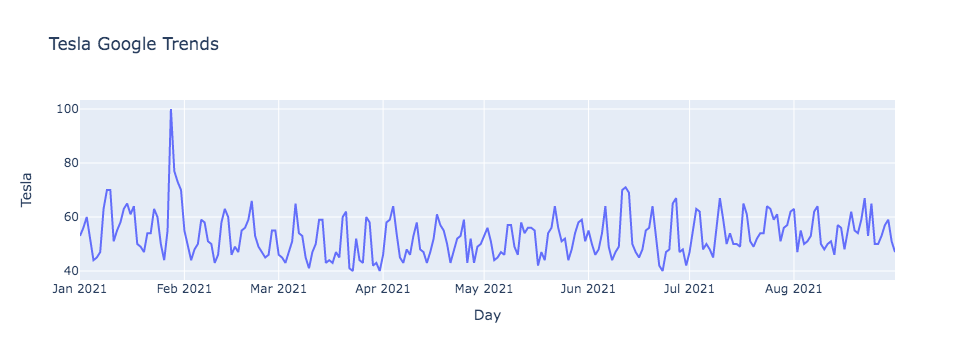

In [123]:
tesla_trend_chart_line = px.line(
    tesla_trends,
    x="Day",
    y="Tesla",
    title="Tesla Google Trends",
)
tesla_trend_chart_line

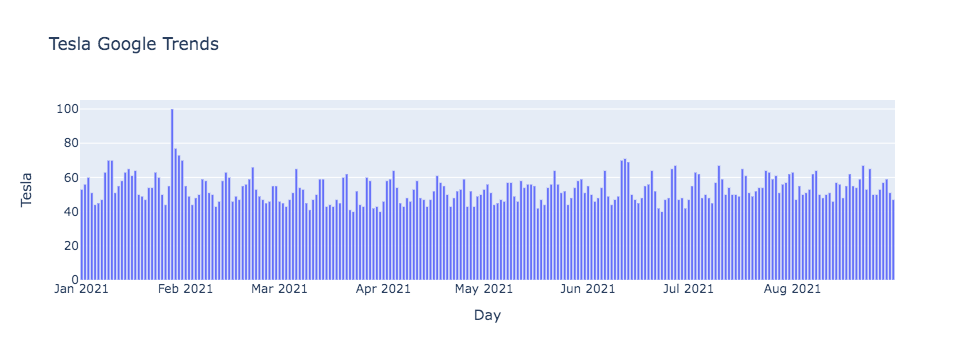

In [124]:
tesla_trend_chart_bar = px.bar(
    tesla_trends,
    x="Day",
    y="Tesla",
    title="Tesla Google Trends",
)
tesla_trend_chart_bar

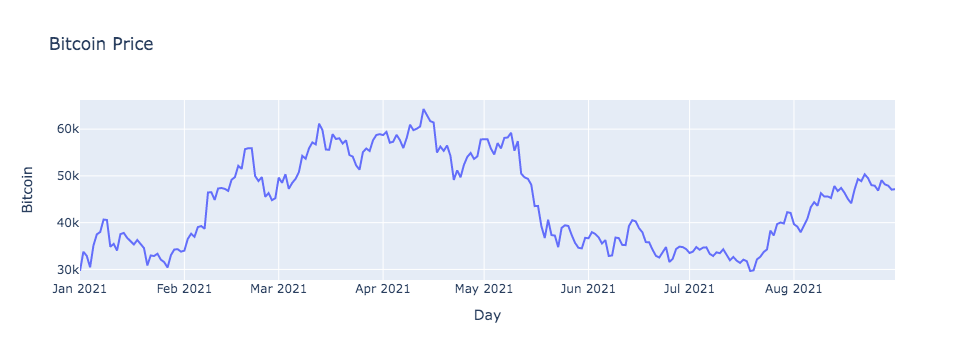

In [128]:
btc_prices_chart = px.line(
    btc_prices,
    y="Bitcoin",
    title="Bitcoin Price",
)
btc_prices_chart

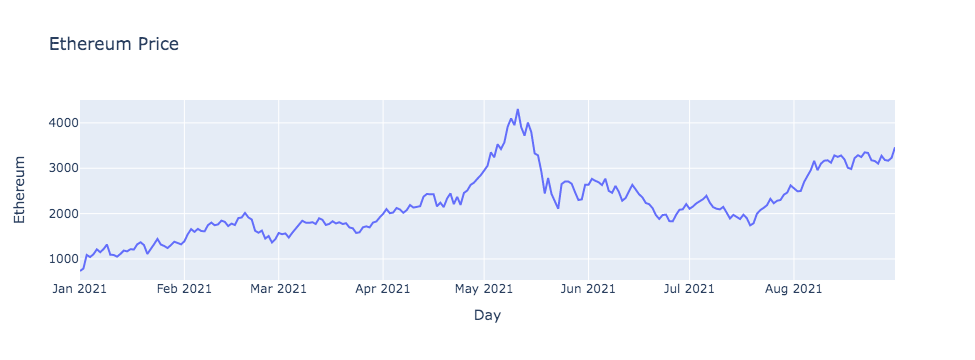

In [129]:
eth_prices_chart = px.line(
    eth_prices,
    y="Ethereum",
    title="Ethereum Price",
)
eth_prices_chart